In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('inputs/clean_data_loan_default_prediction.csv')
data.head()


,Loan Category,Amount,Interest Rate,Tenure(years),Employmet type,Tier of Employment,Work Experience,Total Income(PA),Gender,Married,Dependents,Home,Social Profile,Is_verified,Delinq_2yrs,Total Payement,Received Principal,Interest Received,Number of loans,Defaulter
0,Consolidation,0,11.84,6,Salaried,B,1.5,125000.0,Female,Yes,4,rent,No,missing,0,1824.150000,971.46,852.69,0,1
1,Consolidation,0,16.94,4,Self - Employeed,D,10.0,61000.0,Female,No,1,mortgage,missing,Source Verified,0,22912.532998,18000.00,4912.53,0,0
2,Consolidation,0,11.84,6,missing,missing,7.5,100000.0,Other,missing,3,own,No,missing,0,7800.440000,4489.76,3310.68,0,1
3,Credit Card,0,14.71,4,missing,missing,2.5,30000.0,Male,missing,1,rent,Yes,missing,0,6672.050000,5212.29,1459.76,0,0
4,Credit Card,0,14.71,4,missing,missing,10.0,65000.0,Male,missing,3,rent,No,Verified,0,11793.001345,10000.00,1793.00,0,0


In [4]:
data.iloc[0]

Loan Category         Consolidation
Amount                            0
Interest Rate                 11.84
Tenure(years)                     6
Employmet type             Salaried
Tier of Employment                B
Work Experience                 1.5
Total Income(PA)           125000.0
Gender                       Female
Married                         Yes
Dependents                        4
Home                           rent
Social Profile                   No
Is_verified                 missing
Delinq_2yrs                       0
Total Payement              1824.15
Received Principal           971.46
Interest Received            852.69
Number of loans                   0
Defaulter                         1
Name: 0, dtype: object

In [5]:
data.columns

Index(['Loan Category', 'Amount', 'Interest Rate', 'Tenure(years)',
       'Employmet type', 'Tier of Employment', 'Work Experience',
       'Total Income(PA)', 'Gender', 'Married', 'Dependents', 'Home',
       'Social Profile', 'Is_verified', 'Delinq_2yrs', 'Total Payement ',
       'Received Principal', 'Interest Received', 'Number of loans',
       'Defaulter'],
      dtype='object')

Text(0.5, 1.0, 'Correlation Matrix')

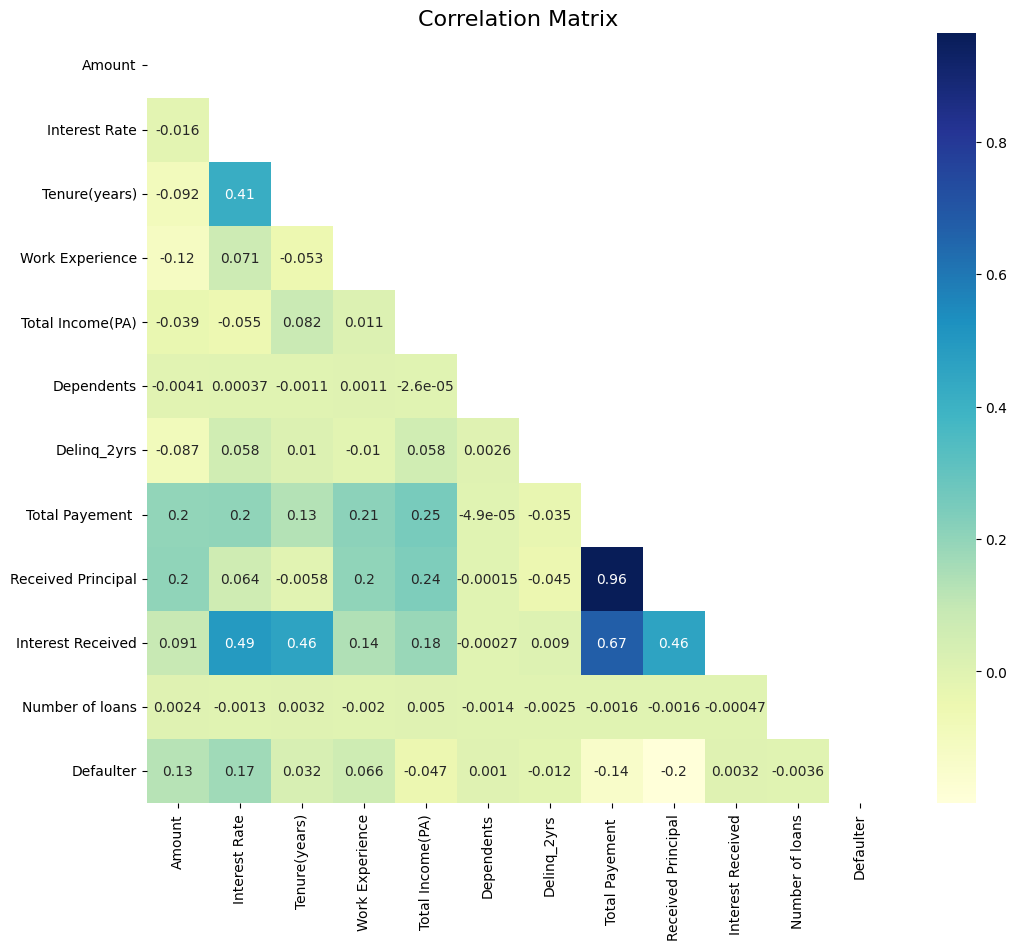

In [6]:
data_final = data[['Amount', 'Interest Rate', 'Tenure(years)', 'Work Experience', 'Total Income(PA)', 'Dependents', 'Delinq_2yrs', 'Total Payement ', 'Received Principal','Interest Received','Number of loans', 'Defaulter']]
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 10))
mask = np.triu(np.ones_like(data_final.corr()))
sns.heatmap(data_final.corr(),cmap="YlGnBu", annot=True, mask=mask)
ax.set_title('Correlation Matrix', fontsize=16)

,Loan Category,Defaulter
0,Business,0.198999
6,Other,0.114196
5,Medical,0.114155
2,Consolidation,0.097866
4,Home,0.091233
1,Car,0.081130
3,Credit Card,0.070476


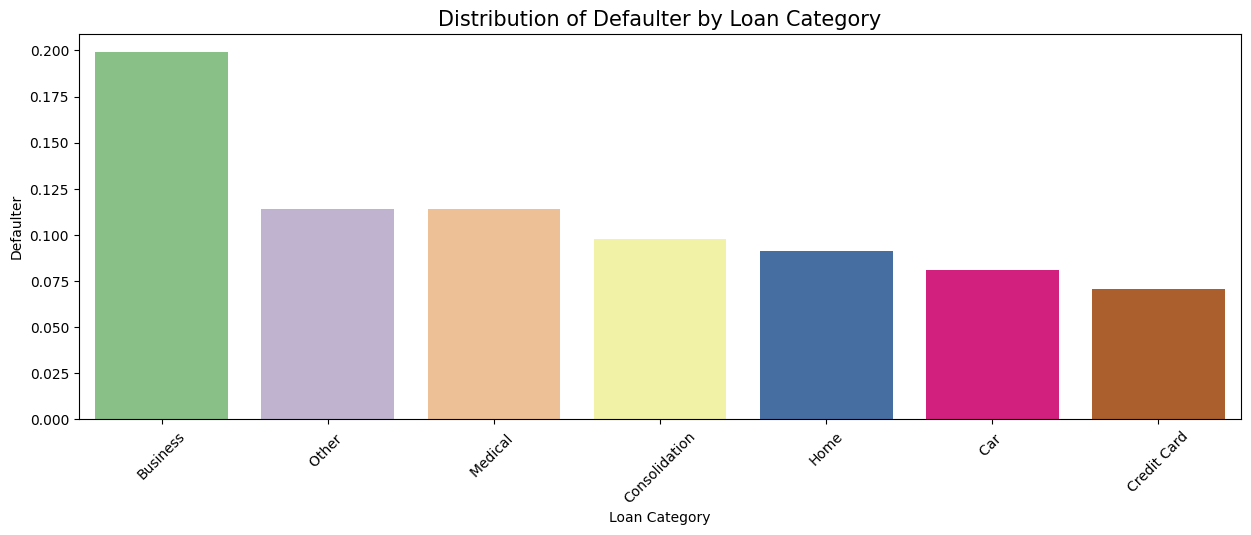

In [7]:
temp = (data.groupby('Loan Category')['Defaulter'].mean()
            .reset_index().sort_values(by='Defaulter',ascending=False)[:10])
display(temp)

plt.figure(figsize=(15,5))
sns.barplot(x=temp['Loan Category'],y=temp['Defaulter'], palette=("Accent"))
plt.title("Distribution of Defaulter by Loan Category",size=15)
plt.xticks(rotation=45)
plt.show()

In [8]:
# Saving the mapping dict for inference use
loan_category_map = data.groupby('Loan Category')['Defaulter'].mean().to_dict()

import pickle
fileName = 'model/loan_category_map.pkl'
with open(fileName,'wb') as f:
    pickle.dump(loan_category_map, f)

loan_category_map

{'Business': 0.19899874843554444,
 'Car ': 0.0811298076923077,
 'Consolidation': 0.09786598427567361,
 'Credit Card': 0.07047619047619047,
 'Home': 0.09123261080556454,
 'Medical ': 0.1141552511415525,
 'Other ': 0.11419579633584355}

In [9]:
data['Defaulter by Loan Category'] =  data.groupby('Loan Category')['Defaulter'].transform('mean')

,Employmet type,Defaulter
1,Self - Employeed,0.146941
0,Salaried,0.092274
2,missing,0.087486


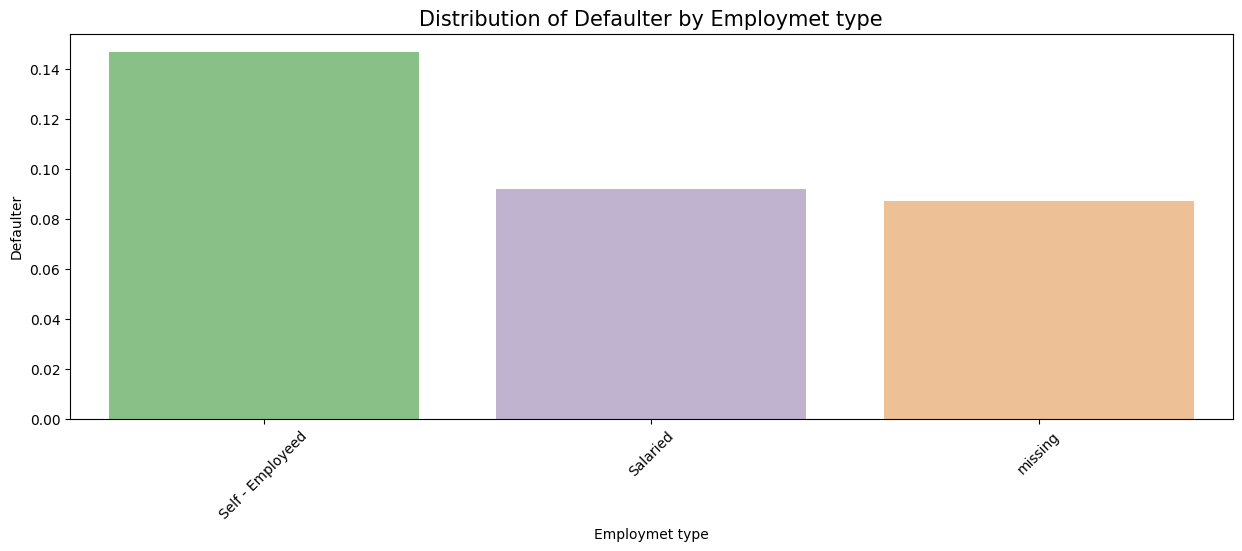

In [10]:
temp = (data.groupby('Employmet type')['Defaulter'].mean()
            .reset_index().sort_values(by='Defaulter',ascending=False)[:10])
display(temp)

plt.figure(figsize=(15,5))
sns.barplot(x=temp['Employmet type'],y=temp['Defaulter'], palette=("Accent"))
plt.title("Distribution of Defaulter by Employmet type",size=15)
plt.xticks(rotation=45)
plt.show()

In [11]:
# Saving the mapping dict for inference use
employmet_type_map = data.groupby('Employmet type')['Defaulter'].mean().to_dict()

import pickle
fileName = 'model/employmet_type_map.pkl'
with open(fileName,'wb') as f:
    pickle.dump(employmet_type_map, f)

employmet_type_map

{'Salaried': 0.09227396116099394,
 'Self - Employeed': 0.14694059848146493,
 'missing': 0.08748611800288272}

In [12]:
data['Defaulter by Employmet type'] =  data.groupby('Employmet type')['Defaulter'].transform('mean')

,Gender,Defaulter
2,Other,0.094764
0,Female,0.093380
1,Male,0.092987


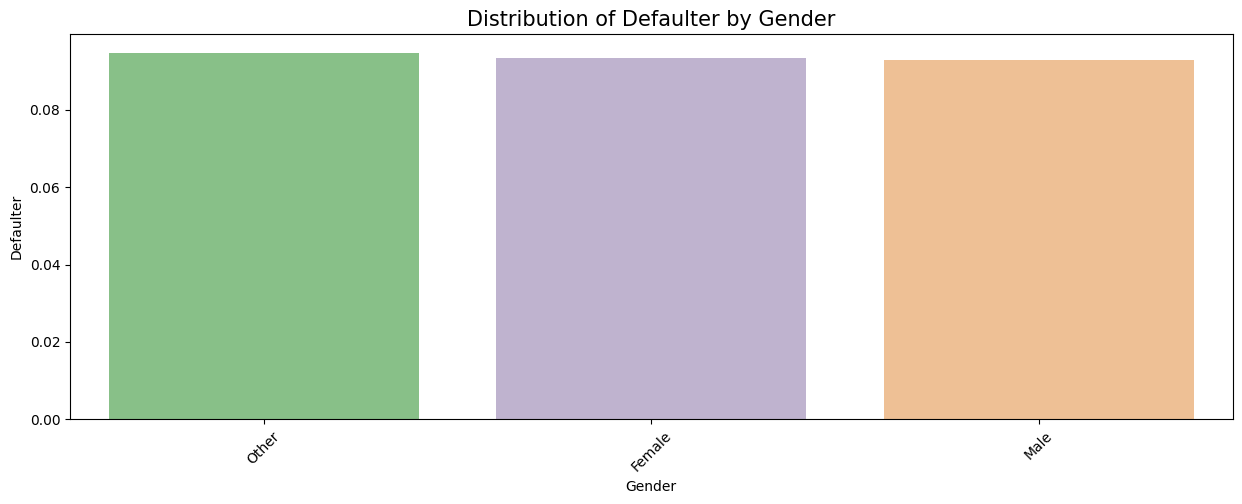

In [13]:
temp = (data.groupby('Gender')['Defaulter'].mean()
            .reset_index().sort_values(by='Defaulter',ascending=False)[:10])
display(temp)

plt.figure(figsize=(15,5))
sns.barplot(x=temp['Gender'],y=temp['Defaulter'], palette=("Accent"))
plt.title("Distribution of Defaulter by Gender",size=15)
plt.xticks(rotation=45)
plt.show()

In [14]:
### Every gender make same effect on Deafaulter, that's why no need make new feature from gender.

,Home,Defaulter
2,other,0.195652
1,none,0.166667
4,rent,0.106097
3,own,0.090246
0,mortgage,0.083519


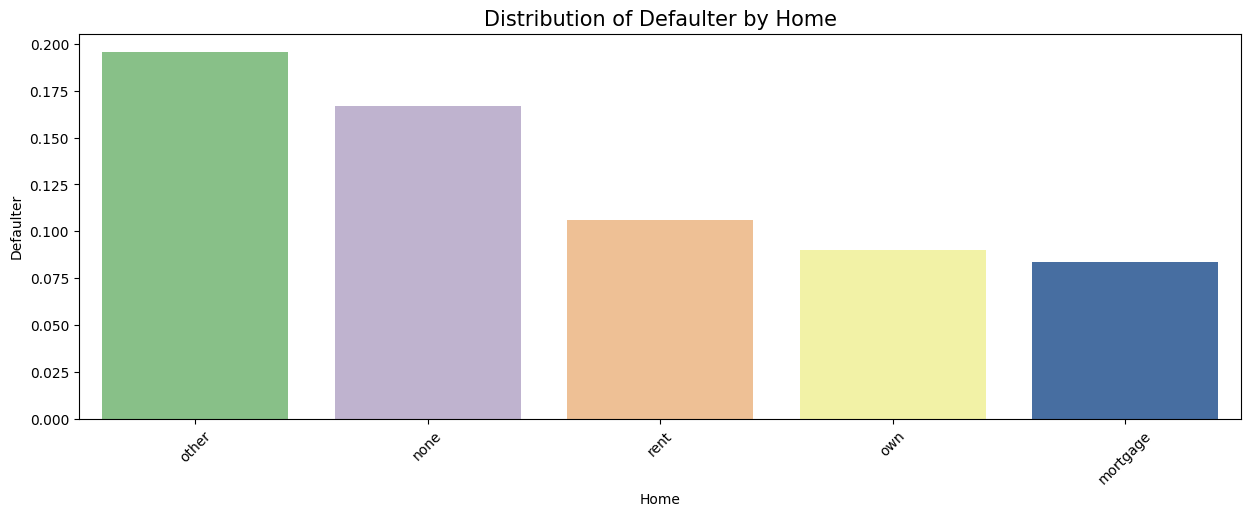

In [15]:

temp = (data.groupby('Home')['Defaulter'].mean()
            .reset_index().sort_values(by='Defaulter',ascending=False)[:10])
display(temp)

plt.figure(figsize=(15,5))
sns.barplot(x=temp['Home'],y=temp['Defaulter'], palette=("Accent"))
plt.title("Distribution of Defaulter by Home",size=15)
plt.xticks(rotation=45)
plt.show()

In [16]:
# Saving the mapping dict for inference use
home_map = data.groupby('Home')['Defaulter'].mean().to_dict()

import pickle
fileName = 'model/home_map.pkl'
with open(fileName,'wb') as f:
    pickle.dump(home_map, f)

home_map

{'mortgage': 0.08351931330472102,
 'none': 0.16666666666666666,
 'other': 0.1956521739130435,
 'own': 0.09024557135254314,
 'rent': 0.10609711814610637}

In [17]:
data['Defaulter by Home'] =  data.groupby('Home')['Defaulter'].transform('mean')

,Married,Defaulter
2,missing,0.093991
1,Yes,0.093576
0,No,0.093569


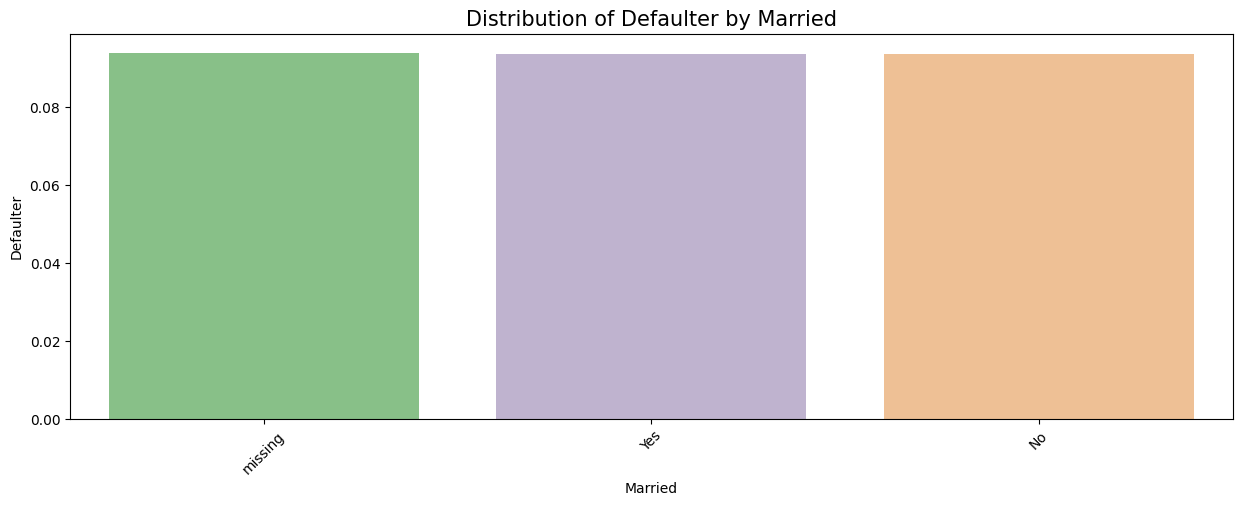

In [18]:
temp = (data.groupby('Married')['Defaulter'].mean()
            .reset_index().sort_values(by='Defaulter',ascending=False)[:10])
display(temp)

plt.figure(figsize=(15,5))
sns.barplot(x=temp['Married'],y=temp['Defaulter'], palette=("Accent"))
plt.title("Distribution of Defaulter by Married",size=15)
plt.xticks(rotation=45)
plt.show()

In [19]:
### Married and un-married person make same effect on Deafaulter, that's why no need make new feature from married.

,Is_verified,Defaulter
3,missing,0.095327
1,Source Verified,0.094649
0,Not Verified,0.093547
2,Verified,0.091329


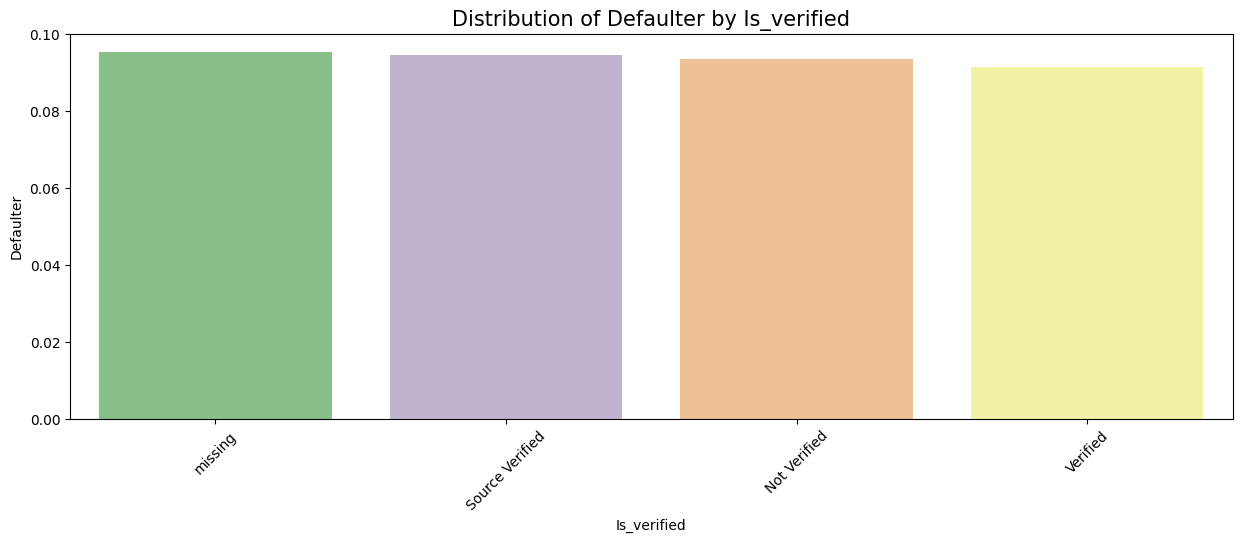

In [20]:
temp = (data.groupby('Is_verified')['Defaulter'].mean()
            .reset_index().sort_values(by='Defaulter',ascending=False)[:10])
display(temp)

plt.figure(figsize=(15,5))
sns.barplot(x=temp['Is_verified'],y=temp['Defaulter'], palette=("Accent"))
plt.title("Distribution of Defaulter by Is_verified",size=15)
plt.xticks(rotation=45)
plt.show()

In [21]:
# Saving the mapping dict for inference use
Is_verified_map = data.groupby('Is_verified')['Defaulter'].mean().to_dict()

import pickle
fileName = 'model/Is_verified_map.pkl'
with open(fileName,'wb') as f:
    pickle.dump(Is_verified_map, f)

Is_verified_map

{'Not Verified': 0.09354713421738889,
 'Source Verified': 0.09464906184850591,
 'Verified': 0.0913294153691892,
 'missing': 0.0953272072172723}

In [22]:
data['Defaulter by Is_verified'] =  data.groupby('Is_verified')['Defaulter'].transform('mean')

In [23]:
data.head()

,Loan Category,Amount,Interest Rate,Tenure(years),Employmet type,Tier of Employment,Work Experience,Total Income(PA),Gender,Married,...,Delinq_2yrs,Total Payement,Received Principal,Interest Received,Number of loans,Defaulter,Defaulter by Loan Category,Defaulter by Employmet type,Defaulter by Home,Defaulter by Is_verified
0,Consolidation,0,11.84,6,Salaried,B,1.5,125000.0,Female,Yes,...,0,1824.150000,971.46,852.69,0,1,0.097866,0.092274,0.106097,0.095327
1,Consolidation,0,16.94,4,Self - Employeed,D,10.0,61000.0,Female,No,...,0,22912.532998,18000.00,4912.53,0,0,0.097866,0.146941,0.083519,0.094649
2,Consolidation,0,11.84,6,missing,missing,7.5,100000.0,Other,missing,...,0,7800.440000,4489.76,3310.68,0,1,0.097866,0.087486,0.090246,0.095327
3,Credit Card,0,14.71,4,missing,missing,2.5,30000.0,Male,missing,...,0,6672.050000,5212.29,1459.76,0,0,0.070476,0.087486,0.106097,0.095327
4,Credit Card,0,14.71,4,missing,missing,10.0,65000.0,Male,missing,...,0,11793.001345,10000.00,1793.00,0,0,0.070476,0.087486,0.106097,0.091329


In [24]:
data.columns

Index(['Loan Category', 'Amount', 'Interest Rate', 'Tenure(years)',
       'Employmet type', 'Tier of Employment', 'Work Experience',
       'Total Income(PA)', 'Gender', 'Married', 'Dependents', 'Home',
       'Social Profile', 'Is_verified', 'Delinq_2yrs', 'Total Payement ',
       'Received Principal', 'Interest Received', 'Number of loans',
       'Defaulter', 'Defaulter by Loan Category',
       'Defaulter by Employmet type', 'Defaulter by Home',
       'Defaulter by Is_verified'],
      dtype='object')

,Social Profile,Defaulter
1,Yes,0.094954
0,No,0.093784
2,missing,0.092402


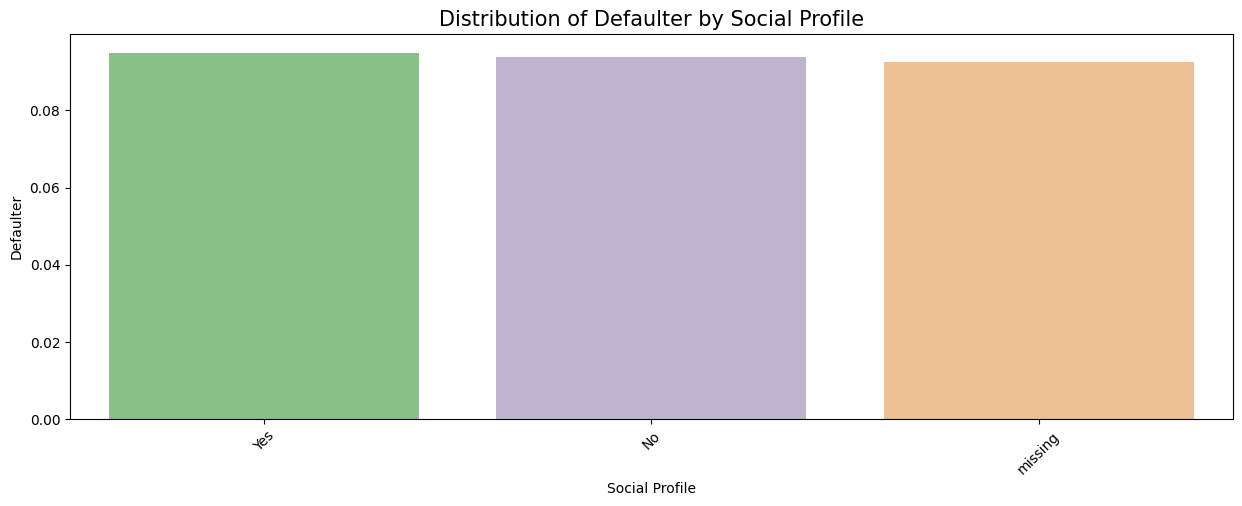

In [25]:

temp = (data.groupby('Social Profile')['Defaulter'].mean()
            .reset_index().sort_values(by='Defaulter',ascending=False)[:10])
display(temp)

plt.figure(figsize=(15,5))
sns.barplot(x=temp['Social Profile'],y=temp['Defaulter'], palette=("Accent"))
plt.title("Distribution of Defaulter by Social Profile",size=15)
plt.xticks(rotation=45)
plt.show()

In [26]:
data.columns

Index(['Loan Category', 'Amount', 'Interest Rate', 'Tenure(years)',
       'Employmet type', 'Tier of Employment', 'Work Experience',
       'Total Income(PA)', 'Gender', 'Married', 'Dependents', 'Home',
       'Social Profile', 'Is_verified', 'Delinq_2yrs', 'Total Payement ',
       'Received Principal', 'Interest Received', 'Number of loans',
       'Defaulter', 'Defaulter by Loan Category',
       'Defaulter by Employmet type', 'Defaulter by Home',
       'Defaulter by Is_verified'],
      dtype='object')

In [27]:
data.drop(['Loan Category', 'Employmet type', 'Tier of Employment', 'Gender', 'Married', 'Home',	'Social Profile', 'Is_verified'], axis=1, inplace=True)
data.head()

,Amount,Interest Rate,Tenure(years),Work Experience,Total Income(PA),Dependents,Delinq_2yrs,Total Payement,Received Principal,Interest Received,Number of loans,Defaulter,Defaulter by Loan Category,Defaulter by Employmet type,Defaulter by Home,Defaulter by Is_verified
0,0,11.84,6,1.5,125000.0,4,0,1824.150000,971.46,852.69,0,1,0.097866,0.092274,0.106097,0.095327
1,0,16.94,4,10.0,61000.0,1,0,22912.532998,18000.00,4912.53,0,0,0.097866,0.146941,0.083519,0.094649
2,0,11.84,6,7.5,100000.0,3,0,7800.440000,4489.76,3310.68,0,1,0.097866,0.087486,0.090246,0.095327
3,0,14.71,4,2.5,30000.0,1,0,6672.050000,5212.29,1459.76,0,0,0.070476,0.087486,0.106097,0.095327
4,0,14.71,4,10.0,65000.0,3,0,11793.001345,10000.00,1793.00,0,0,0.070476,0.087486,0.106097,0.091329


In [28]:
data.columns

Index(['Amount', 'Interest Rate', 'Tenure(years)', 'Work Experience',
       'Total Income(PA)', 'Dependents', 'Delinq_2yrs', 'Total Payement ',
       'Received Principal', 'Interest Received', 'Number of loans',
       'Defaulter', 'Defaulter by Loan Category',
       'Defaulter by Employmet type', 'Defaulter by Home',
       'Defaulter by Is_verified'],
      dtype='object')

In [30]:
featuresMod = ['Amount', 'Interest_Rate', 'Tenure(years)', 'Work_Experience',
       'Total_Income(PA)', 'Dependents', 'Delinq_2yrs', 'Total_Payement ',
       'Received_Principal', 'InterestReceived', 'Number_of_loans',
       'Defaulter', 'Defaulter_by_Loan_Category',
       'Defaulter_by_Employmet_type', 'Defaulter_by_Home',
       'Defaulter_by_Is_verified']

In [38]:
data.columns = list(featuresMod)

In [32]:

import pickle
fileName = 'model/features.pkl'

with open(fileName, 'wb') as f:
    pickle.dump(featuresMod,f)

In [39]:
from sklearn.model_selection import train_test_split
X= data.drop(['Defaulter'], axis=1)
y = data['Defaulter']


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =42, stratify=y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(114981, 15) (114981,)
(28746, 15) (28746,)


In [45]:
def get_metrics_score(model,train,test,train_y,test_y,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(train)
    pred_test = model.predict(test)
    
    train_acc = model.score(train,train_y)
    test_acc = model.score(test,test_y)
    
    train_recall = metrics.recall_score(train_y,pred_train)
    test_recall = metrics.recall_score(test_y,pred_test)
    
    train_precision = metrics.precision_score(train_y,pred_train)
    test_precision = metrics.precision_score(test_y,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(train,train_y))
        print("Accuracy on test set : ",model.score(test,test_y))
        print("Recall on training set : ",metrics.recall_score(train_y,pred_train))
        print("Recall on test set : ",metrics.recall_score(test_y,pred_test))
        print("Precision on training set : ",metrics.precision_score(train_y,pred_train))
        print("Precision on test set : ",metrics.precision_score(test_y,pred_test))
        print("log_loss on training set : ",metrics.log_loss(train_y,pred_train))
        print("log_loss on test set : ",metrics.log_loss(test_y,pred_test))
    return score_list # returning the list with train and test scores

In [46]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [47]:
from tqdm import tqdm
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import RidgeClassifier,LassoCV,RidgeClassifierCV
from sklearn.metrics import mean_squared_error, make_scorer,mean_squared_log_error
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier)
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')


models = []  # Empty list to store all the models

# Appending pipelines for each model into the list
models.append(
    (
        "ridge",
        Pipeline(
            steps=[
                ("ridge", RidgeClassifier(random_state=1)),
            ]
        ),
    )
)

models.append(
    (
        "RF",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("random_forest", RandomForestClassifier(random_state=1)),
            ]
        ),
    )
)

models.append(
    (
        "Bagging",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("random_forest", BaggingClassifier(random_state=1)),
            ]
        ),
    )
)

models.append(
    (
        "DTREE",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("decision_tree", DecisionTreeClassifier(random_state=1,)),
            ]
        ),
    )
)

models.append(
    (
        "XGB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("xgboost", XGBClassifier(random_state=1,eval_metric='logloss')),
            ]
        ),
    )
)


models.append(
    (
        "logistic",
        Pipeline(
            steps=[
                ("logistic", LogisticRegression(random_state=1)),
            ]
        ),
    )
)


models.append(
    (
        "lgbm",
        Pipeline(
            steps=[
                ("LGBM", LGBMClassifier(random_state=1)),
            ]
        ),
    )
)


models.append(
    (
        "SGD",
        Pipeline(
            steps=[
                ("SGD", SGDClassifier(random_state=1)),
            ]
        ),
    )
)




results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
from tqdm import tqdm
for name, model in tqdm(models):
    # Setting number of splits equal to 5
    scores = cross_val_score(model,X_train,y_train, cv=5,
                             scoring='accuracy')
    results.append(scores)
    names.append(name)
    print("{}: {}".format(name, scores.mean() * 100))

 12%|██████████████▏                                                                                                  | 1/8 [00:00<00:01,  5.00it/s]

ridge: 92.55007401004676


 25%|████████████████████████████▎                                                                                    | 2/8 [00:48<02:52, 28.77s/it]

RF: 96.38983914446918


 38%|██████████████████████████████████████████▍                                                                      | 3/8 [01:08<02:02, 24.46s/it]

Bagging: 97.36826200711532


 50%|████████████████████████████████████████████████████████▌                                                        | 4/8 [01:11<01:03, 15.99s/it]

DTREE: 96.32200110834486


 62%|██████████████████████████████████████████████████████████████████████▋                                          | 5/8 [01:12<00:31, 10.52s/it]

XGB: 97.39174389804661


 75%|████████████████████████████████████████████████████████████████████████████████████▊                            | 6/8 [01:13<00:14,  7.46s/it]

logistic: 96.02629905828506
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 8620, number of negative: 83364
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001691 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1215
[LightGBM] [Info] Number of data points in the train set: 91984, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.093712 -> initscore=-2.269131
[LightGBM] [Info] Start training from score -2.269131
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 8620, number of negative: 83365
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001529 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not en

 88%|██████████████████████████████████████████████████████████████████████████████████████████████████▉              | 7/8 [01:14<00:05,  5.32s/it]

lgbm: 96.7516373016747


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [01:16<00:00,  9.55s/it]

SGD: 94.74086646996457


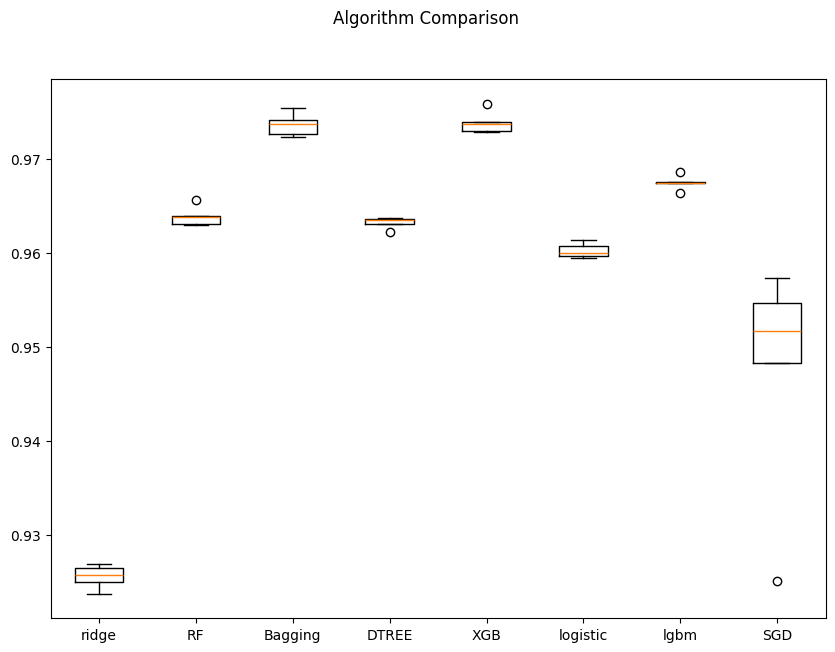

In [48]:
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")




ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

# Logistic Regression

In [49]:
# start Grid search
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}
log_reg = LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1)
log_reg_grid.fit(X_train,y_train)
print("Best parameters are {} with CV score={}:" .format(log_reg_grid.best_params_,log_reg_grid.best_score_))

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters are {'C': 0.01, 'penalty': 'l2'} with CV score=0.9604195475774259:


In [50]:
model = LogisticRegression(C=0.01, penalty='l2')
model.fit(X_train, y_train)

LogisticRegression(C=0.01)

Accuracy on training set :  0.9596976891834303
Accuracy on test set :  0.9589855979962429
Recall on training set :  0.5935034802784223
Recall on test set :  0.5883444691907943
Precision on training set :  0.9617987667318394
Precision on test set :  0.9577039274924471
log_loss on training set :  1.4526425218529053
log_loss on test set :  1.4783088897853311


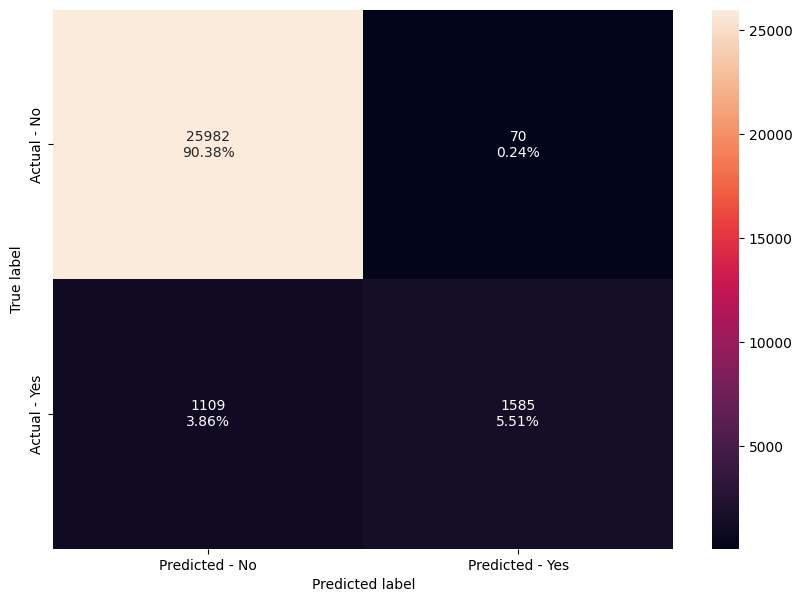

In [51]:
from sklearn import metrics

get_metrics_score(model,X_train,X_test,y_train,y_test)

# Creating confusion matrix
make_confusion_matrix(model, y_test)

## Bagging

In [134]:
%%time

# Creating pipeline
pipe = make_pipeline(StandardScaler(), BaggingClassifier())

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "baggingclassifier__n_estimators": [100, 150, 250],
    "baggingclassifier__max_features": [0.3, 0.4, 0.5, 'sqrt', 'log2'],
    "baggingclassifier__max_samples": np.arange(0.2, 0.6, 0.1),
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.accuracy_score)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_, randomized_cv.best_score_))


Best parameters are {'baggingclassifier__n_estimators': 150, 'baggingclassifier__max_samples': 0.5000000000000001, 'baggingclassifier__max_features': 0.5} with CV score=0.9406771208475065:
CPU times: user 30min 38s, sys: 548 ms, total: 30min 38s
Wall time: 30min 38s


In [137]:
model = BaggingClassifier(n_estimators= 150, max_samples= 0.5000000000000001, max_features=0.5)
model.fit(X_train, y_train)

BaggingClassifier(max_features=0.5, max_samples=0.5000000000000001,
                  n_estimators=150)

Accuracy on training set :  0.984075629886677
Accuracy on test set :  0.9399220761149377
Recall on training set :  0.8300696055684454
Recall on test set :  0.36599851521900517
Precision on training set :  1.0
Precision on test set :  0.981094527363184
log_loss on training set :  0.5739724768046333
log_loss on test set :  2.165427864850947


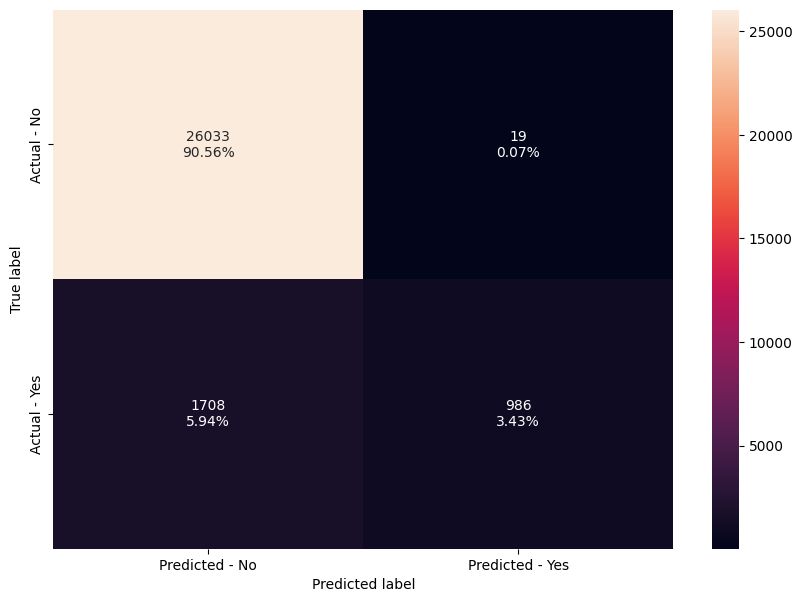

In [138]:
from sklearn import metrics

get_metrics_score(model,X_train,X_test,y_train,y_test)

# Creating confusion matrix
make_confusion_matrix(model, y_test)

# XGBClassifier

In [52]:
%%time
from xgboost import XGBClassifier

# Creating pipeline with XGBoost
pipe_xgb = make_pipeline(StandardScaler(), XGBClassifier())

# Parameter grid to pass in RandomizedSearchCV
param_grid_xgb = {
    "xgbclassifier__n_estimators": [100, 150, 250],
    "xgbclassifier__learning_rate": [0.01, 0.1, 0.2],
    "xgbclassifier__max_depth": [3, 4, 5],
    "xgbclassifier__subsample": [0.8, 0.9, 1.0],
    "xgbclassifier__colsample_bytree": [0.8, 0.9, 1.0],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.accuracy_score)

# Calling RandomizedSearchCV
randomized_cv_xgb = RandomizedSearchCV(estimator=pipe_xgb, param_distributions=param_grid_xgb, n_iter=50, scoring=scorer, cv=5, random_state=1)

# Fitting parameters in RandomizedSearchCV
randomized_cv_xgb.fit(X_train, y_train)
print("Best parameters are {} with CV score={}:".format(randomized_cv_xgb.best_params_, randomized_cv_xgb.best_score_))


Best parameters are {'xgbclassifier__subsample': 1.0, 'xgbclassifier__n_estimators': 250, 'xgbclassifier__max_depth': 5, 'xgbclassifier__learning_rate': 0.2, 'xgbclassifier__colsample_bytree': 1.0} with CV score=0.9744566594115035:
CPU times: user 10min 22s, sys: 873 ms, total: 10min 23s
Wall time: 42.9 s


In [53]:
model = XGBClassifier(subsample=1.0, n_estimators= 250, max_depth= 5, learning_rate= 0.2, colsample_bytree=1.0)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=250, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Accuracy on training set :  0.9814665031613918
Accuracy on test set :  0.974779099700828
Recall on training set :  0.8129002320185614
Recall on test set :  0.7605790645879733
Precision on training set :  0.9870407933288258
Precision on test set :  0.9624236730859559
log_loss on training set :  0.6680149361390898
log_loss on test set :  0.9090533885448391


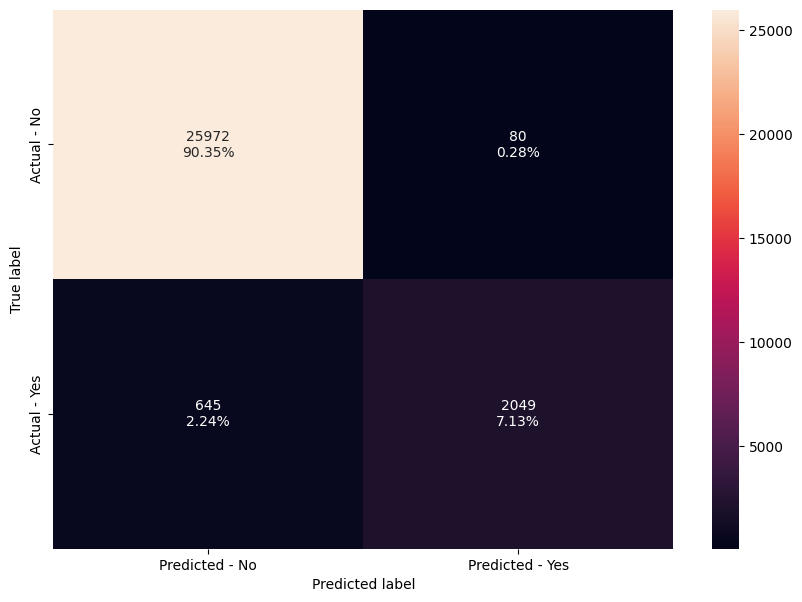

In [54]:
from sklearn import metrics

get_metrics_score(model,X_train,X_test,y_train,y_test)

# Creating confusion matrix
make_confusion_matrix(model, y_test)

In [55]:
import pickle
fileName = 'model/classification_model.pkl'
with open(fileName,'wb') as f:
    pickle.dump(model,f)